L1 regularization, also known as Lasso Regularization, is a technique in machine learning and statistics where a penalty equal to the absolute value of the magnitude of coefficients is added to the loss function. It helps prevent overfitting and also performs feature selection by shrinking some coefficients exactly to zero.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Logistic Regression model with L1 regularization
# Note: solver='liblinear' supports L1 penalty
model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=200)

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with L1 Regularization: {accuracy * 100:.2f}%")

# Optional: Check which coefficients are zero (feature selection effect)
print("Model coefficients:")
print(model.coef_)


Test Accuracy with L1 Regularization: 77.78%
Model coefficients:
[[ 0.          0.8583315  -1.10711819  0.        ]
 [ 0.         -0.21617837  0.01196141  0.        ]
 [-0.7254508   0.          0.93425881  0.        ]]


L1 and L2 regularization in logistic regression on the Iris dataset, showing accuracy and coefficients to see the effect of regularization:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load data
X, y = load_iris(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression with L1 regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=200)
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)
acc_l1 = accuracy_score(y_test, y_pred_l1)

# Logistic Regression with L2 regularization
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=0.1, max_iter=200)
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
acc_l2 = accuracy_score(y_test, y_pred_l2)

print(f"L1 Regularization Test Accuracy: {acc_l1 * 100:.2f}%")
print(f"L2 Regularization Test Accuracy: {acc_l2 * 100:.2f}%\n")

print("L1 Regularization Coefficients (showing zeros):")
print(np.round(model_l1.coef_, 3))

print("\nL2 Regularization Coefficients:")
print(np.round(model_l2.coef_, 3))


L1 Regularization Test Accuracy: 77.78%
L2 Regularization Test Accuracy: 82.22%

L1 Regularization Coefficients (showing zeros):
[[ 0.     0.858 -1.107  0.   ]
 [ 0.    -0.216  0.012  0.   ]
 [-0.725  0.     0.934  0.   ]]

L2 Regularization Coefficients:
[[ 0.171  0.668 -1.094 -0.481]
 [ 0.038 -0.534  0.221 -0.177]
 [-0.546 -0.476  0.83   0.633]]


L1 Regularization Test Accuracy: 77.78%
L2 Regularization Test Accuracy: 82.22%


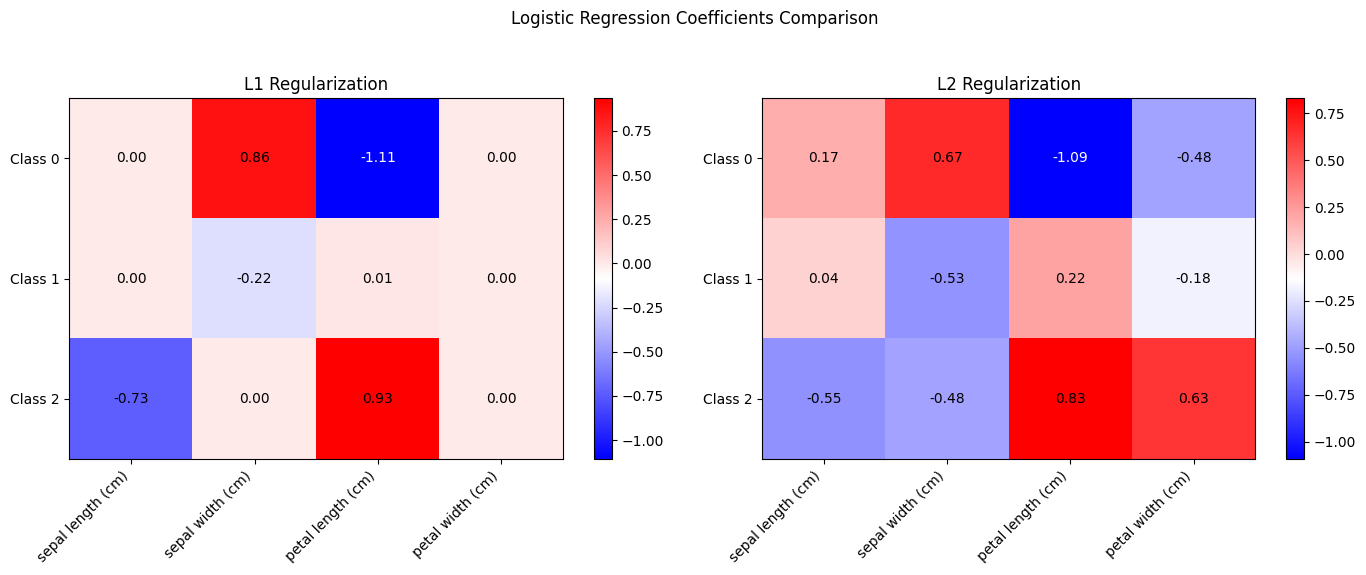

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# L1 Regularization model
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=200)
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)
acc_l1 = accuracy_score(y_test, y_pred_l1)

# L2 Regularization model
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=0.1, max_iter=200)
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
acc_l2 = accuracy_score(y_test, y_pred_l2)

print(f"L1 Regularization Test Accuracy: {acc_l1 * 100:.2f}%")
print(f"L2 Regularization Test Accuracy: {acc_l2 * 100:.2f}%")

# Coefficients
coef_l1 = model_l1.coef_
coef_l2 = model_l2.coef_

# Plotting
feature_names = load_iris().feature_names
classes = ['Class 0', 'Class 1', 'Class 2']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, (coef, title) in enumerate(zip([coef_l1, coef_l2], ['L1 Regularization', 'L2 Regularization'])):
    ax = axes[i]
    im = ax.imshow(coef, cmap='bwr', aspect='auto')
    ax.set_xticks(np.arange(len(feature_names)))
    ax.set_xticklabels(feature_names, rotation=45, ha='right')
    ax.set_yticks(np.arange(len(classes)))
    ax.set_yticklabels(classes)
    ax.set_title(title)
    for (j, k), val in np.ndenumerate(coef):
        ax.text(k, j, f"{val:.2f}", ha='center', va='center',
                color='black' if abs(val) < 1 else 'white')
    fig.colorbar(im, ax=ax)

plt.suptitle("Logistic Regression Coefficients Comparison")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Example: Simple Neural Network with L1 Regularization + Dropout

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1

model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=l1(0.001), input_shape=(784,)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l1(0.001)),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)